# Introduction to Predictive Maintenance

**Predictive Maintenance (PdM)** is a **data-driven maintenance strategy** where machines use sensor measurements, historical records, and machine learning models **to predict failures before they occur and detect early signs of degradation**.  

Instead of waiting for breakdowns, **industries monitor parameters** like *temperature, vibration, force, pressure, and speed* **to identify abnormal patterns that indicate an upcoming fault.**

Predictive maintenance allows companies to:

- Reduce downtime  
- Lower repair and operational costs  
- Extend machine and tool lifespan  
- Improve machine reliability and safety   

PdM is a key component of modern Industrial IoT and Industry 4.0 systems.

---

# Real Industrial Example of Predictive Maintenance

Below is a real case demonstrating **how predictive maintenance delivers value in practical industrial settings**.

### BMW Group – Predicting Failures on Production Machines

BMW monitors vibration, torque, and temperature signals from robots and machining tools across its vehicle production lines.

**AI models detect deviations early and notify technicians** before breakdowns occur, preventing costly assembly line interruptions.

**Reference:** https://www.press.bmwgroup.com/global/article/detail/T0338859EN


This highlights how predictive maintenance transforms raw sensor data into actionable maintenance decisions.

---



# Our Dataset and Use Case

In this project, we work with the **AI4I 2020 Predictive Maintenance Dataset** from the UCI Machine Learning Repository:

Source: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

Kaggle:
https://www.kaggle.com/datasets/abdelazizsami/predictive-maintenance-dataset


The dataset closely resemble a **robotic machining arm** used in industrial production lines.

These robotic machines are used for **drilling, cutting metal parts, welding, picking and assembling heavy objects**. They generate sensor readings such as temperature, torque, rotational speed, and tool wear.

Below are some visuals for a Robotic Machine Arm.

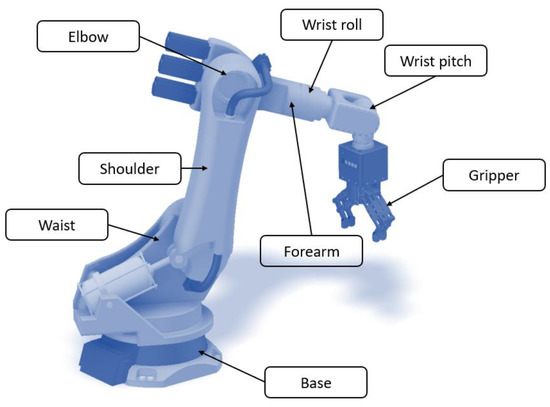

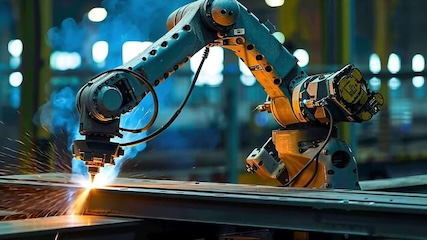

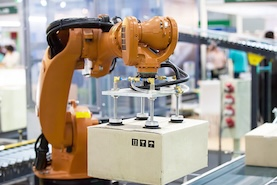

**Failures of Machines in a production line can stop or slow down manufacturing processes.**

Not predicting such failures in time can lead to:

- Unplanned downtime of the line  
- Scrap or rework of produced parts  
- Higher emergency repair costs  
- Missed delivery deadlines

**Our Goal:** **To build a predictive model that estimates whether the machine is likely to fail.**


This is a simplified but realistic **demonstration of how predictive maintenance models are used in industry** **to support maintenance planning and avoid costly disruptions**.

#Understanding Dataset

The dataset contains 10,000 observations with the following key variables:

- **Air temperature [K]** – ambient temperature around the machine  
- **Process temperature [K]** – temperature closer to the process/tool zone  
- **Rotational speed [rpm]** – rotation speed of the tool or spindle  
- **Torque [Nm]** – load or resistance experienced by the rotating tool  
- **Tool wear [min]** – accumulated usage time of the tool in minutes  
- **Failure mode indicators (TWF, HDF, PWF, OSF, RNF)** – which physical mechanism caused a failure  
- **Machine failure** – overall target label (1 = failure, 0 = no failure)


Let's begin analysing our dataset.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load dataset

df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Feature Description

The dataset includes 14 columns:

*   UID: Unique Row Identifier
*   Product ID: Unique Product Identifier
*   Type: Includes quality category (Low, Medium, High)
*   Air temperature [K]
*   Process temperature [K]
*   Rotational speed [rpm]
*   Torque [Nm]
*   Tool wear [min]
*   **Machine failure:** Binary target
*   TWF, HDF, PWF, OSF, RNF: Individual failure modes  like **Tool Wear Failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Random Failure**

We analyze each column through distributions and summary statistics.

In [ ]:
categorical_cols = ["Product ID", "Type", "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"]

for col in categorical_cols:
    print(f"Distribution for {col}:")
    print(df[col].value_counts())
    print("\n")

Distribution for Product ID:
Product ID
L57163    1
M24842    1
L57161    1
L57160    1
L57159    1
         ..
L47184    1
L47183    1
L47182    1
L47181    1
M14860    1
Name: count, Length: 10000, dtype: int64


Distribution for Type:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


Distribution for Machine failure:
Machine failure
0    9661
1     339
Name: count, dtype: int64


Distribution for TWF:
TWF
0    9954
1      46
Name: count, dtype: int64


Distribution for HDF:
HDF
0    9885
1     115
Name: count, dtype: int64


Distribution for PWF:
PWF
0    9905
1      95
Name: count, dtype: int64


Distribution for OSF:
OSF
0    9902
1      98
Name: count, dtype: int64


Distribution for RNF:
RNF
0    9981
1      19
Name: count, dtype: int64




## Target Variable Imbalance

**Class imbalance** is a critical aspect in predictive maintenance as **machine failure occurs in only a small percentage of samples.**

We quantify the imbalance to understand the severity.

In [ ]:
failure_counts = df["Machine failure"].value_counts()
failure_percentage = df["Machine failure"].value_counts(normalize=True) * 100

print("Machine Failure Count:")
print(failure_counts)
print("\nMachine Failure Percentage:")
print(failure_percentage)

Machine Failure Count:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Machine Failure Percentage:
Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64


### Key Insights on Failure Imbalance

The ***Machine failure*** column is highly imbalanced: over **96% healthy** (0) and only **3.39% failures** (1).

### Why This Matters
- Accuracy becomes unreliable because the dataset is **dominated by the majority class**.
- Models may **fail to learn the patterns** that indicate **early machine degradation.**

### Common Techniques to Handle Class Imbalance
Below are widely used methods:

**1. Resampling Techniques**
- **Random Undersampling** – reduce majority class samples.  
- **Random Oversampling** – duplicate minority class samples.  
- **SMOTE (Synthetic Minority Oversampling Technique)** – create synthetic examples of failures.  
- **ADASYN** – an adaptive version of SMOTE focusing on harder samples.

**2. Algorithm-Level Techniques**
- **Class weights** – tell the model to “penalize” wrong predictions on rare failure cases more strongly.
- **Balanced Random Forest** – built-in balancing during tree construction.

**3. Evaluation Techniques**
- **Stratified train-test split** – keeps the class ratio consistent in both sets.  
- **Stratified K-Fold Cross-Validation** – ensures the minority class appears in every fold.  
- **Precision, Recall, F1, ROC-AUC** – better metrics for imbalance than accuracy.

These techniques ensure the model learns the rare failure patterns properly, which is **essential for predictive maintenance** where **failures are infrequent but extremely costly**.

## Distribution of Numerical Features

We **plot histograms** for all continuous variables **to understand their ranges and detect skewness or anomalies.**

These include ***Temperatures, Torque, Rotational Speed, and Tool Wear***.

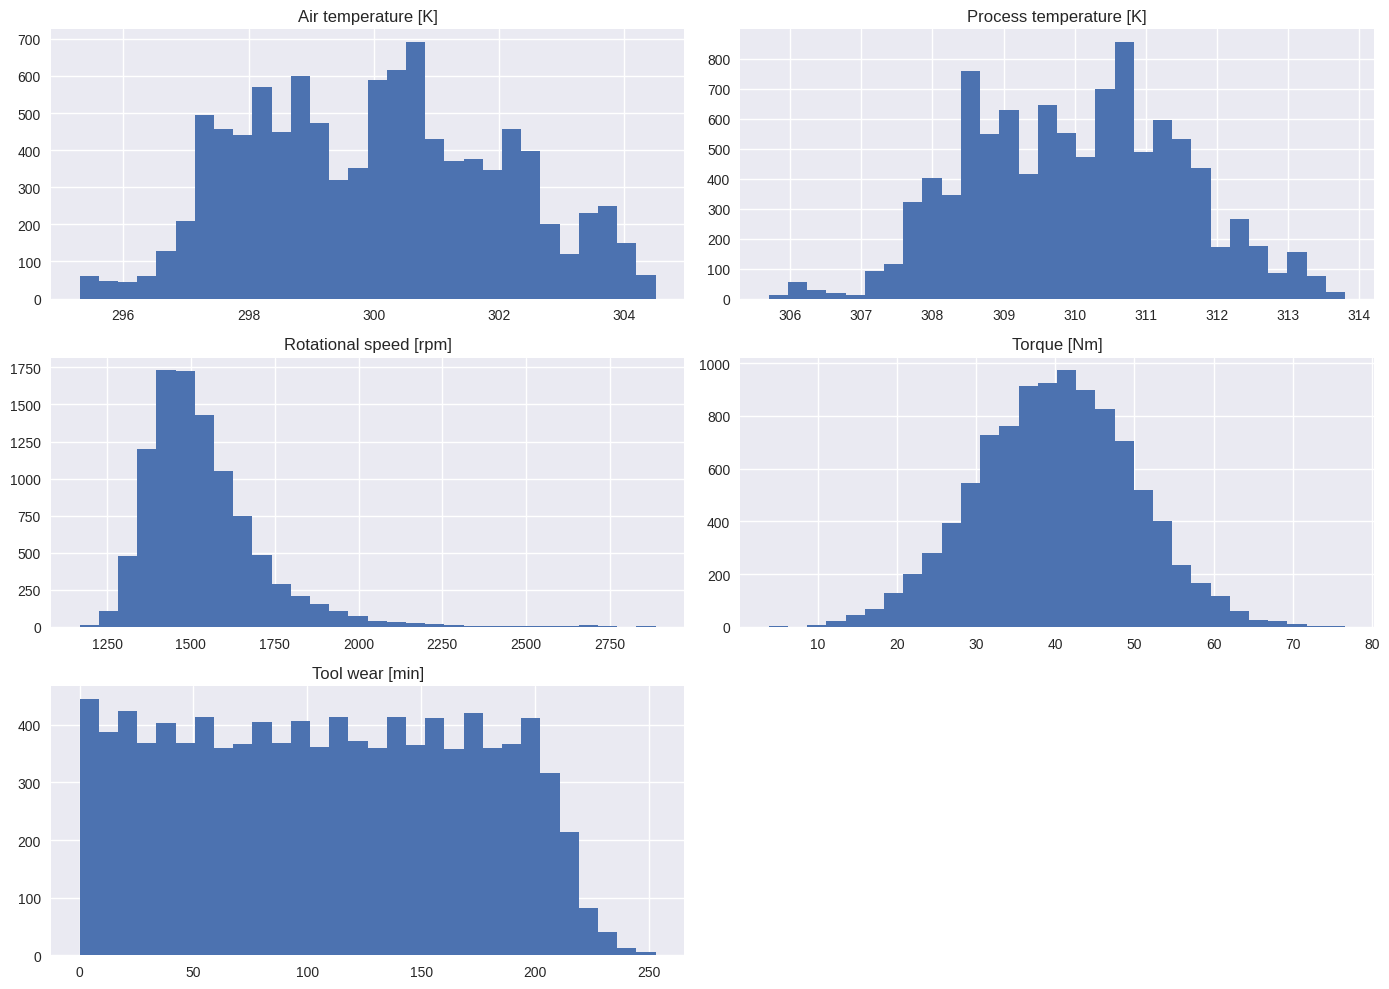

In [ ]:
num_cols = ["Air temperature [K]",
            "Process temperature [K]",
            "Rotational speed [rpm]",
            "Torque [Nm]",
            "Tool wear [min]"]

df[num_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

## Correlation Analysis

A **correlation matrix** helps us identify linear relationships between features.

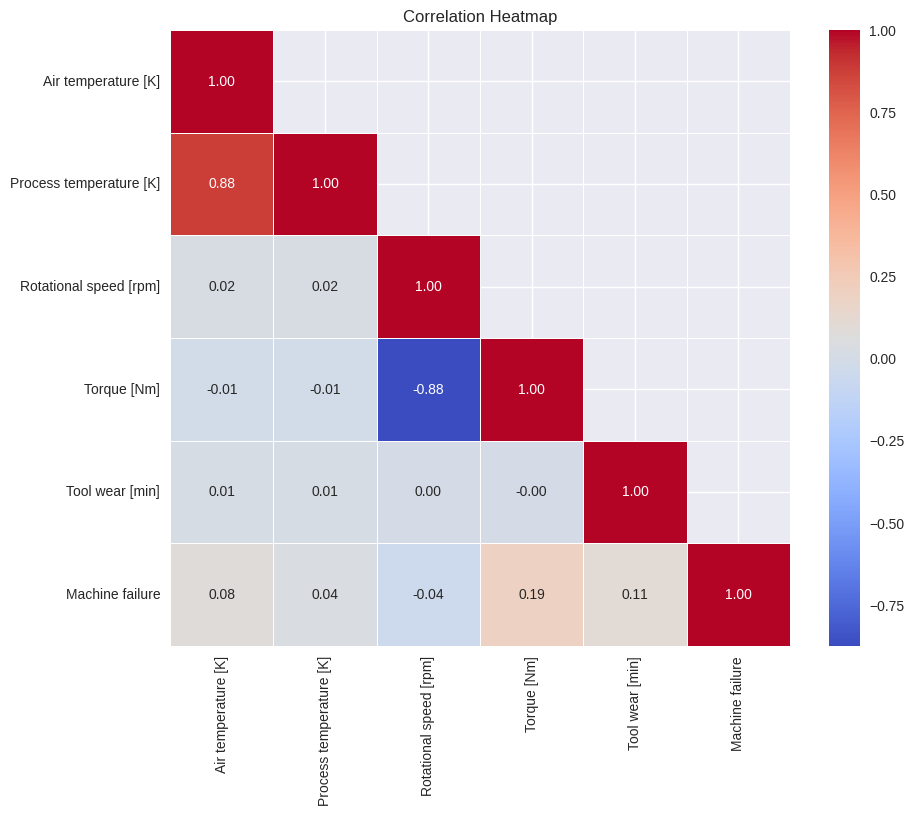

In [ ]:
# Compute correlation matrix
corr = df[num_cols + ["Machine failure"]].corr()

# Mask the **upper triangle**
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,              # hides only the upper triangle ABOVE diagonal
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap")
plt.show()

### Key Insights from the Correlation Heatmap

- **Air temperature** and **Process temperature** have a **strong positive correlation (0.88).**
- **Rotational speed** and **Torque** show a **strong negative correlation (–0.88)** due to their physical power relationship.
- **Machine failure** shows **weak linear correlation** with all features, meaning:
  - Failures are likely caused by **non-linear interactions** between variables  
  - Correlation alone cannot reveal Failure Patterns  
  - Machine Learning models are necessary to capture complex relationships

## How Do Failed Machines Behave Differently?

**To understand what leads to failures**, we visualize the **distribution of key features for failure vs. non-failure cases**.  

Boxplots and density plots help us see whether failures show distinct patterns or shifts in these variables.

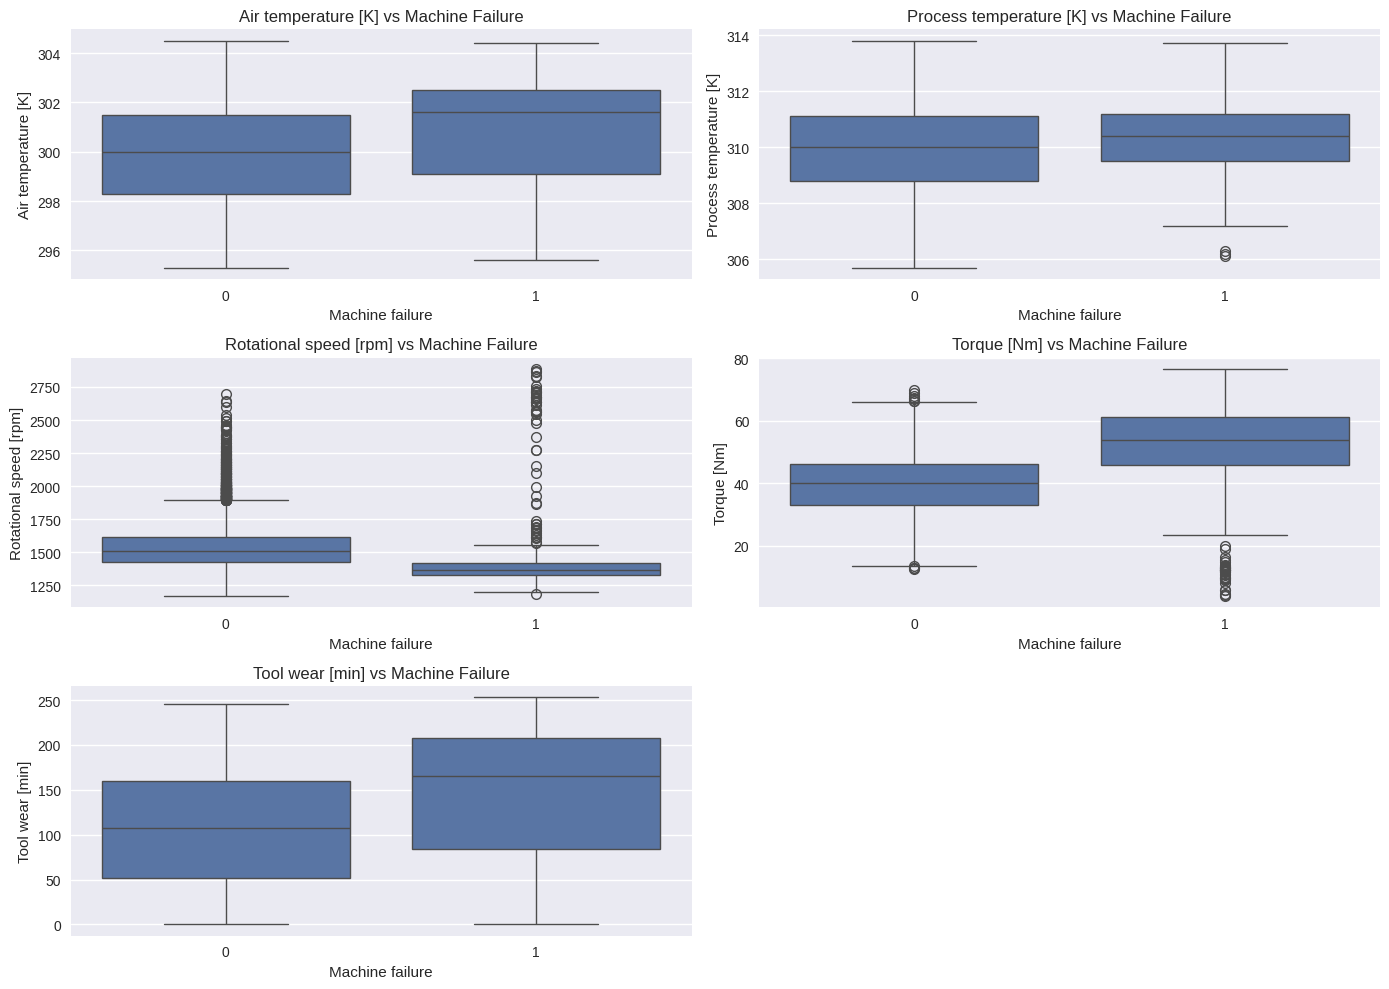

In [ ]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x="Machine failure", y=col, data=df)
    plt.title(f"{col} vs Machine Failure")

plt.tight_layout()
plt.show()

### Key Insights from Boxplots

- **Features showing strong separation** **(Torque, Rotation, Tool Wear)** are likely to help machine learning models.

- **Outliers** are symptoms of failure.

- **The distributions are not simple shifts**; they show complex patterns.

- This hints that **non-linear methods will model the relationships better** than linear methods.
Examples:

	- Random Forest
	- XGBoost
	- SVM

So, we move on to the Machine Learning section where we build and evaluate a model to predict machine failures.

# Machine Learning Modeling Workflow

In this section, we build predictive models for machine failure.

This is a **binary classification task**, where:

- 0 = No failure  
- 1 = Machine failure  

---

## 1. Data Preparation

- **Encode categorical features** using **One-Hot Encoding**  
  - Other encoding methods: Label Encoding, Target Encoding, Binary Encoding, Ordinal Encoding

- **Scale numerical feature**s using **StandardScaler**  
  - Other scaling methods: Min–Max Scaling, Robust Scaling, MaxAbs Scaling, Normalizer

- **Handle class imbalance**  
  - We use **stratified train–test split**  
  - Other imbalance techniques: SMOTE, ADASYN, Random Oversampling, Random Undersampling, Class Weights

- **Train–test split**  
  - We use a **60–40 split**  
  - Common alternatives: 70–30, 80–20, 75–25, or K-Fold / Stratified K-Fold cross-validation

---

## 2. Train Machine Learning Models

We train:

- **Random Forest Classifier**  

Other commonly used binary classification models:

- Logistic Regression  
- Support Vector Machine (SVM)  
- XGBoost Classifier
- LightGBM, CatBoost  
- K-Nearest Neighbors (KNN)  
- Neural Networks / MLP

---

## 3. Model Evaluation

We evaluate the models using:

- **Accuracy**  
- **Precision**
- **Recall**  
- **F1-Score**  
- **Confusion Matrix**
- **Balanced Accuracy**

Additional useful metrics:
- ROC Curve & AUC Score
- Precision–Recall Curve
- Matthews Correlation Coefficient (MCC)
- Cohen’s Kappa


Let's start building a model.


In [ ]:
# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Define features (X) and target (y)
X = df.drop(['Machine failure'], axis=1)
y = df['Machine failure']

In [ ]:
# 3. Identify categorical and numerical columns
cat_cols = ['Product ID', 'Type']
num_cols = X.drop(cat_cols, axis=1).columns

In [ ]:
# 4. Create stratified train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

In [ ]:
# 5. Build preprocessing pipeline (scaling + encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [ ]:
# 6. Fit-transform preprocessing on training data only
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [ ]:
# 7. Train random forest model
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_pre, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 8. Make predictions
rf_preds = rf.predict(X_test_pre)

## Model Evaluation

In [ ]:
# 9. Evaluate model using common classification metrics
print("Classification Report:")
print(classification_report(y_test, rf_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       1.00      0.96      0.98       136

    accuracy                           1.00      4000
   macro avg       1.00      0.98      0.99      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
# 10. Compute balanced accuracy
bal_acc = balanced_accuracy_score(y_test, rf_preds)
print(f"Balanced Accuracy: {bal_acc:.4f}")

Balanced Accuracy: 0.9816


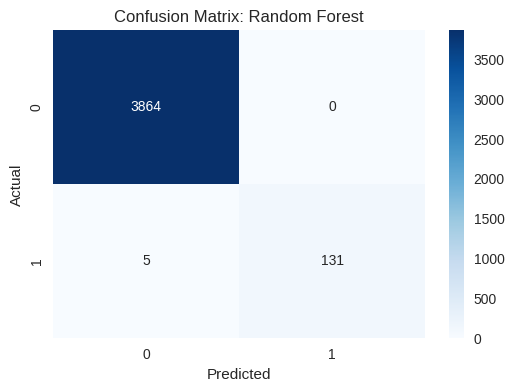

In [ ]:
# 11. Plot confusion matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Key Insights from Random Forest Model Performance

### 1. Accuracy
- **Meaning:** How many total predictions the model got correct.  
- **Interpretation:** The model correctly classified almost all samples **(Accuracy = 1.00)**.

### 2. Precision
- **Meaning:** When the model predicts *failure*, how often it is correct.  
- **Interpretation:** The model made **no false alarms** — every predicted failure was accurate **(Precision = 1.00)**.

### 3. Recall
- **Meaning:** Out of all actual failures, how many the model successfully detected.  
- **Interpretation:** The model detected almost all failures, missing only a few **(Recall = 0.96)**.

### 4. F1-Score
- **Meaning:** Harmonic mean of precision and recall; balances both.  
- **Interpretation:** The model has an excellent balance between detecting failures and avoiding false alarms **(F1-Score = 0.98)**.

### 5. Balanced Accuracy
- **Meaning:** Average recall of each class; useful for imbalanced datasets.  
- **Interpretation:** The model performs strongly on both failure and non-failure classes **(Balanced Accuracy = 0.9816)**.

### Overall Observations
- The model performs **extremely well** on both failure and non-failure samples.  
- **5 actual failures were missed**, and **no false alarms** occurred.  
- This shows the model is learning meaningful patterns in the data.

## Hyperparamter Tuning

Even though our Random Forest model performs very well, it **missed 5 actual failures**.  

In predictive maintenance, **missing a failure can lead to costly downtime, tool damage, or safety risks**.  

So we need to make the model more sensitive to failures.

One way to improve performance is through **hyperparameter tuning**.

### What is Hyperparameter Tuning?
- Machine learning models have settings called *hyperparameters* that control how the model learns.  

- Examples for Random Forest include:
  - `n_estimators` — number of trees  
  - `max_depth` — maximum depth of each tree  
  - `min_samples_split` — minimum samples required to split an internal node  
  - `min_samples_leaf` — minimum samples required in a leaf node  
  - `max_features` — number of features considered at each split  
  - `bootstrap` — whether sampling with replacement is used  
  - `class_weight` — assigns weights to classes to handle imbalance  

- By testing different combinations, we find the set that gives the **best performance**.

### **Common Ways to Tune Hyperparameters**
- **Grid Search**  
- **Random Search**  
- **Cross-Validation–based tuning**  
- **Bayesian Optimization** (advanced)



In [ ]:
# TODO: Tune the hyperparameters for the selected model

# Time-Series Forecasting

**Predictive Maintenace** also aims to **forecast future failures** so maintenance teams can *act* before breakdowns occur.

**What is Time Series Forecasting?**

Time series forecasting uses **historical, time-ordered data to predict future values**.

When applied to industrial machines, **forecasting can reveal when operating conditions are drifting toward failure.**


**Our Goal:** Using the AI4I 2020 dataset, we create a simple LSTM-based time series forecasting model to estimate:

**“What is the probability of machine failure over the next 7 days?”**

Let's start building a forecasting model

In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 2. Load the dataset
df = pd.read_csv("ai4i2020.csv")

In [4]:
# 3. Create timestamp column with 10-minute interval
df["timestamp"] = pd.date_range(start="2020-01-01", periods=len(df), freq="10min")
df = df.sort_values("timestamp").set_index("timestamp")

In [5]:
# 4. Select features used for forecasting
feature_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

In [6]:
# 5. Scale selected features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[feature_cols])

df_scaled = pd.DataFrame(scaled_values, index=df.index, columns=feature_cols)
df_scaled["Machine failure"] = df["Machine failure"]

In [7]:
# 6. Create sequences for the LSTM model
sequence_length = 144  # 24 hours of data (10-min intervals)
X, y = [], []

for i in range(sequence_length, len(df_scaled)):
    X.append(df_scaled.iloc[i-sequence_length:i][feature_cols].values)
    y.append(df_scaled.iloc[i]["Machine failure"])

X = np.array(X)
y = np.array(y)

In [8]:
# 7. Split the data so last 7 days are used for testing
test_steps = 7 * 24 * 6  # 7 days × 24 hours × 6 samples per hour

X_train, X_test = X[:-test_steps], X[-test_steps:]
y_train, y_test = y[:-test_steps], y[-test_steps:]

In [9]:
# 8. Build the LSTM forecasting model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, len(feature_cols))),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

In [10]:
# 9. Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy")

In [11]:
# 10. Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 46s 166ms/step - loss: 0.2659 - val_loss: 0.0922
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 53s 238ms/step - loss: 0.1554 - val_loss: 0.0937
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 37s 165ms/step - loss: 0.1432 - val_loss: 0.0903
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - loss: 0.1643 - val_loss: 0.0851
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 37s 165ms/step - loss: 0.1538 - val_loss: 0.0876
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 33s 149ms/step - loss: 0.1494 - val_loss: 0.0836
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 35s 156ms/step - loss: 0.1475 - val_loss: 0.0858
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - loss: 0.1421 - val_loss: 0.0859
Epoch 9/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 39s 146ms/step - loss: 0.1510 - val_loss: 0.0858
Epoch 10/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 34s 153ms/step - loss: 0.1470 - val_loss: 0.0851


In [12]:

# 11. Prepare for forecasting the next 7 days
future_steps = test_steps
last_sequence = X_test[-1].copy()
future_preds = []

In [13]:
# 12. Generate forecasted failure probabilities

future_timestamps = pd.date_range(
    start=df_scaled.index[-1],
    periods=future_steps + 1,
    freq="10min"
)[1:]

In [14]:
for _ in range(future_steps):
    pred = model.predict(last_sequence.reshape(1, sequence_length, len(feature_cols)), verbose=0)[0][0]
    future_preds.append(pred)

    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = last_sequence[-2]  # Keep pattern stable

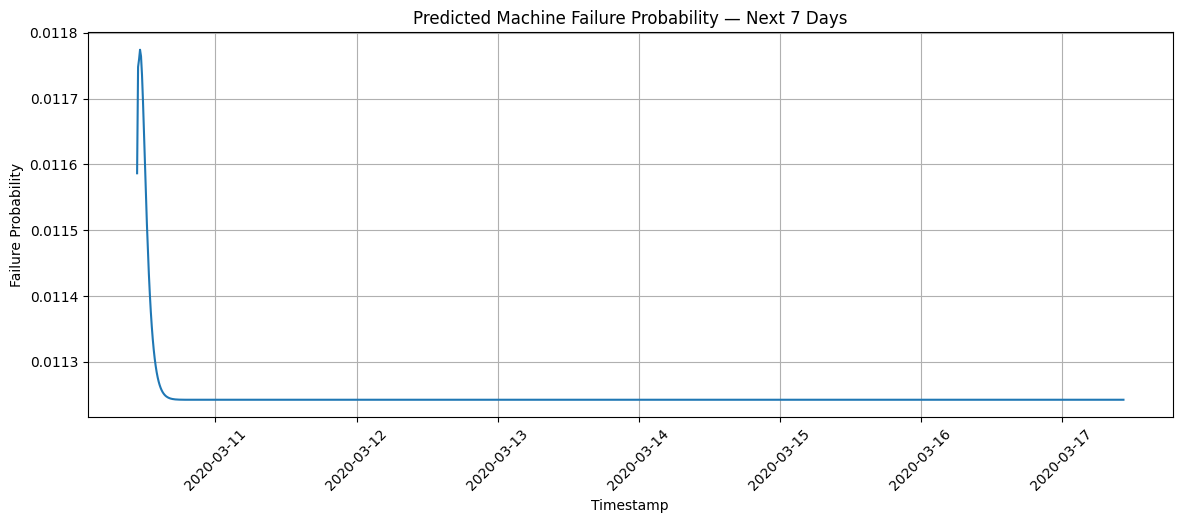

In [15]:
# 13. Plot the prediction for the next 7 days
plt.figure(figsize=(14, 5))
plt.plot(future_timestamps, future_preds, label="Failure Probability")
plt.title("Predicted Machine Failure Probability — Next 7 Days")
plt.xlabel("Timestamp")
plt.ylabel("Failure Probability")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Summary and Key Findings

* We applied a **full predictive maintenance workflow** using real-style industrial sensor data:  from **EDA to ML modeling**.

* The **Random Forest model** achieved **high performance** (Accuracy ≈ **1.00**, Recall for failures ≈ **0.96**).

* **Missed failures (5)** show why **fine-tuning and optimization** are essential in real industrial systems.

* In real industry settings, metrics like **Recall** and **Balanced Accuracy** are prioritized.

* *Missing even a single failure* can result in **thousands of euros in repair costs**, **hours of downtime**, or **operator safety risks**.

* **Forecasting future failure probability** with LSTM offers an actionable time horizon for maintenance planning.   



# Future Scope

* Explore **feature selection techniques** (Filter, Wrapper, Embedded) to identify the most influential sensor variables.

* Perform **model optimization** through hyperparameter tuning for Random Forest (n_estimators, max_depth, min_samples_split, max_features, class_weight).

* Improve **LSTM forecasting** by experimenting with deeper architectures, more units, dropout, and optimized learning rates.
  
  
* Build a **Streamlit dashboard** for interactive visualization of failure risk, model predictions, and near-future forecasts.